In [1]:
#Import dei paccheti per pre-processing
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport

# Import dei pacchetti per modelli di MACHINE LEARNING
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from IPython.display import Image  

#Import per il validation
from sklearn.metrics import accuracy_score

# Import dei pacchetti per i modelli statistici
import statsmodels.api as sm
import statsmodels.formula.api as smf


#Import dataset:
melbourne_file_path = '/home/dami/Progetti_unifi/DMO/Dataset/melb_data.csv'
df = pd.read_csv(melbourne_file_path) 
del melbourne_file_path

#Scelgo covariate e droppo i missing
y = df.Type
COVARIATE = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude','Price']
X = df[COVARIATE]
type(X)

df.dropna(axis=0)
type(y)



pandas.core.series.Series

# Train Test Split

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X,y, train_size=0.75, random_state = 0)
df_model_tree = DecisionTreeClassifier(criterion = 'gini', max_depth = 4)
df_model_tree

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

# SINGLE MODEL WITH FIXED IPERPARMETER(max_depth=3)


In [20]:
df_model_tree = DecisionTreeClassifier(criterion = 'gini', max_depth = 3)
df_model_tree.fit(X_train, y_train)

y_predicted = df_model_tree.predict(X_val)

from sklearn.metrics import accuracy_score
accuracy_score(y_val, y_predicted)

0.8444771723122239

# MODEL TUNING (asses iperparameter (max_depth)
Controllo l'accuratezza del modello sul test set

## TODO: vedi accuratezza sul train e confronta con 'accuratezza trovata nel test set


In [132]:
# Definisco una funzione per depth per calcolare accuracy score + MAE + MSE

In [28]:
def tune_depth_accuracy(depth, X_train, X_val, y_train, y_val):
    model = df_model_tree = DecisionTreeClassifier(criterion = 'gini', max_depth = depth)
    model.fit(X_train, y_train)
    y_predicted = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_predicted)
    return(accuracy)

In [30]:
print(tune_depth_accuracy(3, X_train, X_val, y_train, y_val))

0.8444771723122239


In [73]:
Score_result = []
depth = range(1,15)
for depth in depth:
    Score_i = tune_depth_accuracy(depth, X_train, X_val, y_train, y_val)
    print("Accuracy per max_deapth = " + str(depth) + " è " + str(Score_i))
    Score_result.append(Score_i)

Accuracy per max_deapth = 1 è 0.8017673048600884
Accuracy per max_deapth = 2 è 0.8017673048600884
Accuracy per max_deapth = 3 è 0.8444771723122239
Accuracy per max_deapth = 4 è 0.8465390279823269
Accuracy per max_deapth = 5 è 0.851840942562592
Accuracy per max_deapth = 6 è 0.8642120765832106
Accuracy per max_deapth = 7 è 0.8742268041237113
Accuracy per max_deapth = 8 è 0.8698085419734904
Accuracy per max_deapth = 9 è 0.8656848306332843
Accuracy per max_deapth = 10 è 0.8650957290132548
Accuracy per max_deapth = 11 è 0.8606774668630339
Accuracy per max_deapth = 12 è 0.8509572901325478
Accuracy per max_deapth = 13 è 0.8527245949926362
Accuracy per max_deapth = 14 è 0.8497790868924889


# Adesso ricerco l'arg_max di "Score_result" e da esso risalgo al "depth" corrispondente

In [130]:
#cerco il valore massimo del vettore degli score
arg_max_score = max(Score_result)
arg_max_score_position = Score_result.index(massimo)
print(arg_max_score)

#creo il vettore con le depth
depth = []
for i in range(1,15):
    depth.append(i)

#cerco il valore depth corrispondete alla posizione dell'arg_max_score
best_depth=depth[arg_max_score_position]
print(best_depth)

print("Lo score(accuracy) migliore è pari a " + str(arg_max_score) + "con iperparametro (depth) pari a " + str(best_depth))

0.8742268041237113
7
Lo score(accuracy) migliore è pari a 0.8742268041237113con iperparametro (depth) pari a 7


CONCLUSIONE: \
L'iperparametro (altezza massima) da preferire, in quanto massimizza la metrica di interesse (Accuracy_score), è 7

# PROVO A FARE IL GRAFICO (depth x Accuracy)

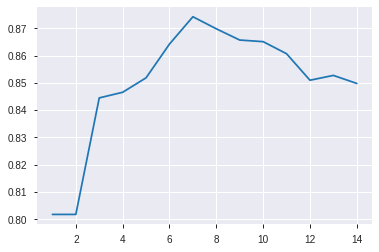

In [129]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(depth,Score_result)
plt.show()